In [210]:
import matplotlib.pyplot as plt

In [211]:
import os
import json

# Define the path to the results folders
results_folder = 'results'
consistency_type = 'textual'
skip = ['MLP', 'transformer_MLP_512'] 
samples = 50
# Get the list of folders in the results folder
folders = os.listdir(results_folder)
data_dict = {}

# Iterate over the folders
for folder in folders:
    # Construct the path to the results.json file
    results_file = os.path.join(results_folder, folder, 'data', 'results.json')
    if consistency_type not in folder:
        print(f"Skipping folder: {folder}")
        continue
    if str(samples) not in folder:
        print(f"Skipping folder: {folder}")
        continue
    # Check if the results.json file exists
    if not os.path.exists(results_file):
        print(f"File not found: {results_file}")
        continue
    

        
    with open(results_file, 'r') as f:
        data = json.load(f)
    
    # get the folder name which is the string between the consistency type and the sample size
    folder_name = folder.split(consistency_type)[1].split(str(samples))[0]
    # remove leading and trailing underscores
    folder_name = folder_name.strip('_')
    if folder_name in skip:
        print(f"Skipping folder: {folder}")
        continue
    # Store the data in the dictionary, using the edited folder name as the key
    data_dict[folder_name] = data

Skipping folder: 2024-05-25-15-28-49_textual_MLP_50
Skipping folder: 2024-05-25-16-07-13_textual_transformer_MLP_512_50
Skipping folder: 2024-05-25-18-46-22_risk_vanilla_classifier_50
Skipping folder: 2024-05-25-18-48-53_risk_transformer_linear_50
Skipping folder: 2024-05-26-10-00-36_risk_softmax_5
Skipping folder: 2024-05-26-10-06-38_risk_softmax_10
Skipping folder: 2024-05-26-10-16-01_risk_softmax_15
Skipping folder: 2024-05-26-10-27-26_risk_softmax_20
Skipping folder: 2024-05-26-10-42-13_risk_softmax_25
Skipping folder: 2024-05-27-12-25-06_risk_softmax_50


In [212]:
data_dict.keys()

dict_keys(['vanilla_classifier', 'softmax', 'transformer_linear_512'])

In [213]:
# del data_dict['transformer_linear_512']

In [214]:
deltas = data_dict['softmax']['deltas']
lambda_list = [(key, data_dict[key]['lambdas']) for key in data_dict.keys()]
L_val_list = [(key, data_dict[key]['L_vals']) for key in data_dict.keys()]
exit_layer_list = [(key, [dic['predict_block_avg'] for dic in data_dict[key]['metrics']]) for key in data_dict.keys()]

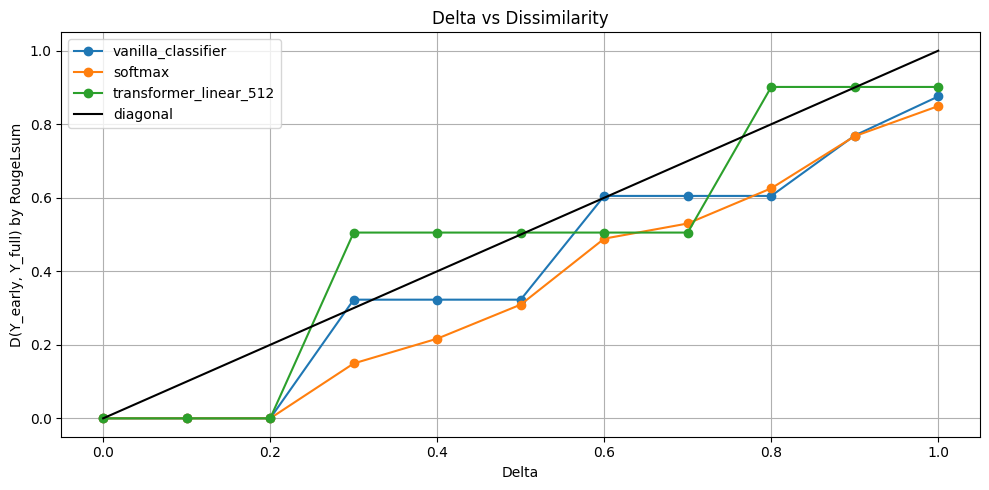

In [215]:
# Plot 1: Delta vs Dissimilarity
plt.figure(figsize=(10, 5))
for name, model_performance in L_val_list:
    plt.plot(deltas, model_performance, marker='o', label=f'{name}')
plt.plot([0, 1], [0, 1], color='black', label='diagonal')
plt.title('Delta vs Dissimilarity')
plt.xlabel('Delta')
plt.ylabel('D(Y_early, Y_full) by RougeLsum')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f"./plots/calibration/delta_vs_dissimilarity_{consistency_type}.png")
plt.show()

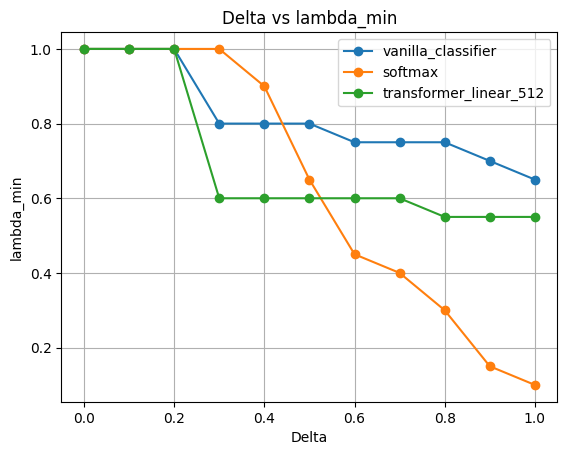

In [216]:
for name, model_performance in lambda_list:
    plt.plot(deltas, model_performance, marker='o', label=f'{name}')

# Adding labels and title
plt.title('Delta vs lambda_min')
plt.xlabel('Delta')
plt.ylabel('lambda_min')
plt.grid(True)
plt.legend()
plt.savefig(f"./plots/calibration/delta_vs_lambda_min_{consistency_type}.png")
# Show plot
plt.show()

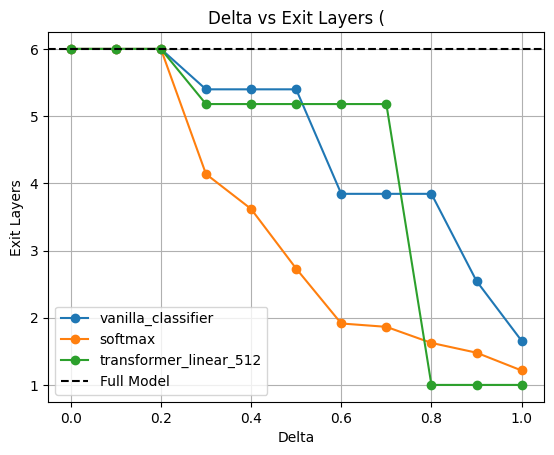

In [217]:
for name, model_performance in exit_layer_list:
    plt.plot(deltas, model_performance, marker='o', label=f'{name}')

# Adding labels and title
plt.title(f'Delta vs Exit Layers (')
plt.axhline(y=6, color='black', linestyle='--', label='Full Model')  # Add horizontal line
plt.xlabel('Delta')
plt.ylabel('Exit Layers')
plt.grid(True)
plt.legend()
plt.savefig(f"./plots/calibration/delta_vs_exit_layers_{consistency_type}.png")

# Show plot
plt.show()

# Sample size effects

In [218]:
import os
import json
import matplotlib.pyplot as plt

# Define the path to the results folders
results_folder = 'results'

# Filter criteria
consistency_type = 'risk'  # Change this to your desired consistency type

# Function to parse the folder names and extract sample size
def parse_folder_name(folder_name):
    parts = folder_name.split('_')
    return {
        'timestamp': parts[0],
        'model_type': parts[2],
        'consistency_type': parts[1],
        'samples': int(parts[-1])
    }

# Get the list of folders in the results folder
folders = os.listdir(results_folder)
data_dict = {}


In [219]:
folders

['2024-05-25-15-02-02_textual_vanilla_classifier_50',
 '2024-05-25-15-15-34_textual_softmax_50',
 '2024-05-25-15-28-49_textual_MLP_50',
 '2024-05-25-15-46-57_textual_transformer_linear_512_50',
 '2024-05-25-16-07-13_textual_transformer_MLP_512_50',
 '2024-05-25-18-46-22_risk_vanilla_classifier_50',
 '2024-05-25-18-48-53_risk_transformer_linear_50',
 '2024-05-26-10-00-36_risk_softmax_5',
 '2024-05-26-10-06-38_risk_softmax_10',
 '2024-05-26-10-16-01_risk_softmax_15',
 '2024-05-26-10-27-26_risk_softmax_20',
 '2024-05-26-10-42-13_risk_softmax_25',
 '2024-05-27-12-25-06_risk_softmax_50']

In [220]:
# Iterate over the folders and filter by consistency type
for folder in folders:
    folder_info = parse_folder_name(folder)
    print(folder_info)
    if folder_info['consistency_type'] != consistency_type:
        continue
    
    # Construct the path to the results.json file
    results_file = os.path.join(results_folder, folder, 'data', 'results.json')
    
    if not os.path.exists(results_file):
        print(f"File not found: {results_file}")
        continue
    
    with open(results_file, 'r') as f:
        data = json.load(f)
    
    # Store the data in the dictionary, using the sample size as the key
    sample_size = folder_info['samples']
    data_dict[sample_size] = []
    
    data_dict[sample_size].append(data)

{'timestamp': '2024-05-25-15-02-02', 'model_type': 'vanilla', 'consistency_type': 'textual', 'samples': 50}
{'timestamp': '2024-05-25-15-15-34', 'model_type': 'softmax', 'consistency_type': 'textual', 'samples': 50}
{'timestamp': '2024-05-25-15-28-49', 'model_type': 'MLP', 'consistency_type': 'textual', 'samples': 50}
{'timestamp': '2024-05-25-15-46-57', 'model_type': 'transformer', 'consistency_type': 'textual', 'samples': 50}
{'timestamp': '2024-05-25-16-07-13', 'model_type': 'transformer', 'consistency_type': 'textual', 'samples': 50}
{'timestamp': '2024-05-25-18-46-22', 'model_type': 'vanilla', 'consistency_type': 'risk', 'samples': 50}
{'timestamp': '2024-05-25-18-48-53', 'model_type': 'transformer', 'consistency_type': 'risk', 'samples': 50}
{'timestamp': '2024-05-26-10-00-36', 'model_type': 'softmax', 'consistency_type': 'risk', 'samples': 5}
{'timestamp': '2024-05-26-10-06-38', 'model_type': 'softmax', 'consistency_type': 'risk', 'samples': 10}
{'timestamp': '2024-05-26-10-16-0

In [221]:
data_dict.keys()

dict_keys([50, 5, 10, 15, 20, 25])

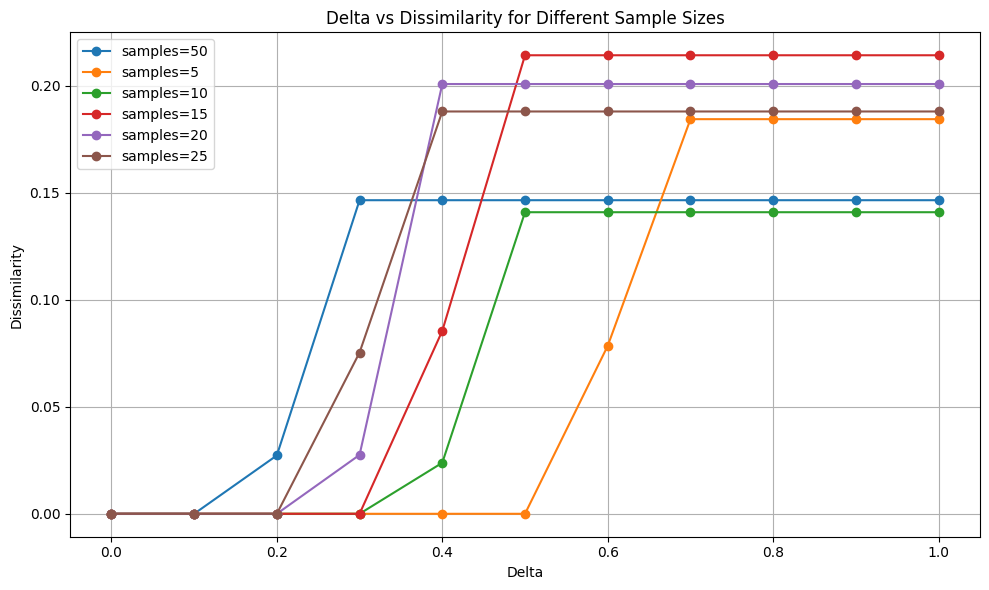

In [222]:



# Example keys for deltas and dissimilarities (update these based on your JSON structure)
delta_key = 'deltas'
dissimilarity_key = 'L_vals'

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for sample_size, data_list in data_dict.items():
    # Aggregate deltas and dissimilarities for each sample size
    deltas = []
    dissimilarities = []
    for data in data_list:
        deltas.extend(data[delta_key])
        dissimilarities.extend(data[dissimilarity_key])
    
    ax.plot(deltas, dissimilarities, marker='o', label=f'samples={sample_size}')

# Adding labels and title
ax.set_title('Delta vs Dissimilarity for Different Sample Sizes')
ax.set_xlabel('Delta')
ax.set_ylabel('Dissimilarity')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


## Generate table 2 from section 6

In [223]:
import json
import pandas as pd

def load_metrics(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data['metrics'], data['deltas']


def extract_data(metrics, deltas, measure, consistency_type, selected_deltas):
    data = []
    delta_indices = {delta: idx for idx, delta in enumerate(deltas)}

    for delta in selected_deltas:
        idx = delta_indices[delta]
        # Extracting the first and last metrics for the given delta
        first_metric = metrics[idx]
        last_metric = metrics[-len(deltas) + idx]

        # Calculating speedup and FLOPs ratio as multipliers
        # speedup = first_metric['predict_runtime'] / last_metric['predict_runtime']
        # flops_r = first_metric['predict_samples_per_second'] / last_metric['predict_samples_per_second']

        # Extracting the necessary metrics
        layers = last_metric['predict_block_avg']

        # Append the row to data
        data.append([delta, consistency_type, measure, layers ])
    
    return data


# Define file paths and other parameters
file_paths = {
    'softmax': {
        'textual': 'results/2024-05-25-15-15-34_textual_softmax_50/data/results.json',
        'risk': 'results/2024-05-27-12-25-06_risk_softmax_50/data/results.json'
    },
    'classifier': {
        'textual': 'results/2024-05-25-15-02-02_textual_vanilla_classifier_50/data/results.json',
        'risk': 'results/2024-05-25-18-46-22_risk_vanilla_classifier_50/data/results.json'
    }
}

# Define the consistency types and the selected deltas for each measure
consistency_types = {
    'textual': 'Textual consistency',
    'risk': 'Risk consistency'
}

selected_deltas = [ 0.2, 0.4, 0.6000000000000001]  # Example values

# Initialize an empty list to store table data
table_data = []

# Load and process each file
for measure, paths in file_paths.items():
    for consistency, file_path in paths.items():
        metrics, deltas = load_metrics(file_path)
        consistency_type = consistency_types[consistency]
        table_data.extend(extract_data(metrics, deltas, measure, consistency_type, selected_deltas))

# Create the DataFrame
df = pd.DataFrame(table_data, columns=['delta', 'Consistency Type', 'Measure', 'Layers'])
# convert df to markdown
print(df.to_markdown())

|    |   delta | Consistency Type    | Measure    |   Layers |
|---:|--------:|:--------------------|:-----------|---------:|
|  0 |     0.2 | Textual consistency | softmax    |  6       |
|  1 |     0.4 | Textual consistency | softmax    |  3.61893 |
|  2 |     0.6 | Textual consistency | softmax    |  1.91434 |
|  3 |     0.2 | Risk consistency    | softmax    |  2.55093 |
|  4 |     0.4 | Risk consistency    | softmax    |  1.23485 |
|  5 |     0.6 | Risk consistency    | softmax    |  1.23485 |
|  6 |     0.2 | Textual consistency | classifier |  6       |
|  7 |     0.4 | Textual consistency | classifier |  5.39863 |
|  8 |     0.6 | Textual consistency | classifier |  3.84354 |
|  9 |     0.2 | Risk consistency    | classifier |  6       |
| 10 |     0.4 | Risk consistency    | classifier |  1.63859 |
| 11 |     0.6 | Risk consistency    | classifier |  1       |


In [224]:
df

,delta,Consistency Type,Measure,Layers
0,0.2,Textual consistency,softmax,6.000000
1,0.4,Textual consistency,softmax,3.618928
2,0.6,Textual consistency,softmax,1.914338
3,0.2,Risk consistency,softmax,2.550932
4,0.4,Risk consistency,softmax,1.234851
5,0.6,Risk consistency,softmax,1.234851
6,0.2,Textual consistency,classifier,6.000000
7,0.4,Textual consistency,classifier,5.398634
8,0.6,Textual consistency,classifier,3.843541
9,0.2,Risk consistency,classifier,6.000000
